In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# We will focus our analysis on the six product categories recorded for the customers, excluding the ‘Channel’ and ‘Region’ fields
df.drop(['Channel', 'Region'], axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 6)

In [5]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting samples

In [6]:
# select the random samples

indices = [85, 181, 338] # select three indices to sample from dataset
samples= pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop=True)
display(samples) # to gain insights about random customer's spending by comparing it with mean/average spending

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


We will study the relevance of the features for understanding the purchasing behaviours of the customers by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature

### Feature Relevence

In [7]:
df.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338


In [8]:
new_data = df.drop('Grocery', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df.Grocery, 
                                                    test_size=0.25, random_state=42)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('Prediction score is:', score)

Prediction score is: 0.6922521958011406


With this accuracy we can say that this feature(Grocery) is easy to predict considering the rest of spending habit and, therefore, not very necessary for identifying customers' spending habits. ie. not a necessary feature for this dataset as it is correlated to other features.  

### Data Visualizaton
We will also visualize the same in plots.

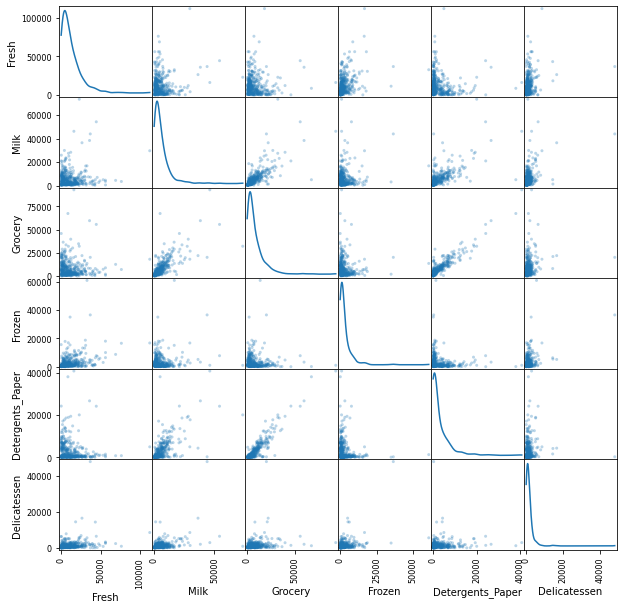

In [9]:
# plot a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal='kde');

In [10]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


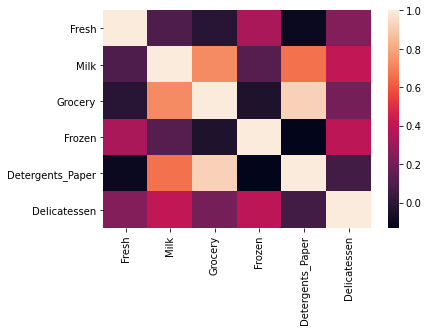

In [11]:
import seaborn as sns

sns.heatmap(df.corr());

There is a strong correlation of 'Grocery' with 'Detergents_Paper' and 'Milk'.  

We can also note that the data is not normally distributed, it is positively skewed and they resemble the log-normal distribution.

## Data Preprocessing

### Feature Scaling
If the data is not normally distributed, especially if mean and median vary significantly(large skew), it is most often appropiate to apply non-linear scaling(particularly to finanical data). A similar approach with works in the most cases would be to apply natural logarithm.

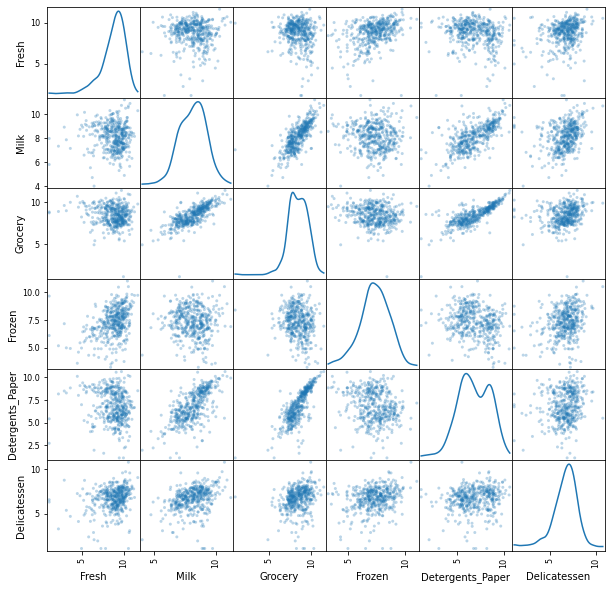

In [12]:
log_data = np.log(df) # scale the data using the natural logarithm
log_samples = np.log(samples) # scale the sample data using the natural logarithm

# produce the scatter matrix
pd.plotting.scatter_matrix(log_data, alpha=0.3, figsize=(10,10), diagonal='kde');

In [13]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### Outlier Detection
We will use Turkey's Method for Detecting Outliers, an outlier step is calculated as 1.5 times the interquartile range(IQR). A data point with the feature that is beyond an outlier step outside IQR, is condsidered as abnormal for that fetaure.

In [14]:
outliers = []

for feature in log_data.keys(): # find extreme high or low value for each data point
    Q1 = np.percentile(log_data[feature], 25) # calculate the 25th percentile of the data
    Q3 = np.percentile(log_data[feature], 75) # calculate the 75th percentile
    
    step = 1.5 * (Q3-Q1) # use IQR to calculate an outlier step(1.5 times IQR)
    
    #display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    # The tilde sign ~ means not
    display(log_data[~((log_data[feature] >= Q1-step) & (log_data[feature] <= Q3+step))])
    lista = log_data[~((log_data[feature] >= Q1-step) & (log_data[feature] <= Q3+step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [15]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [16]:
# Select the indices for data points you wish to remove

# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [17]:
seen = {} # Sets are lists with no duplicate entries
dupes = [] # List of duplicate outliers

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [18]:
# removing the outliers
good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

- Datapoint considered outliers that are present in more than one feature are: 65, 66, 75, 128, 154
- K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that algorithm tries to minimize.  
The loss function is the squared sum of the distances of each datapoint to the centroid, so if the outliers is far enough is will affect the location of centroid.

## Feature Transformation  
### PCA  
Principle Component Analysis (PCA) calculates the dimensions which best maximize variance so with this we will find which combinations of features best describe customers.

In [19]:
log_samples.shape

(3, 6)

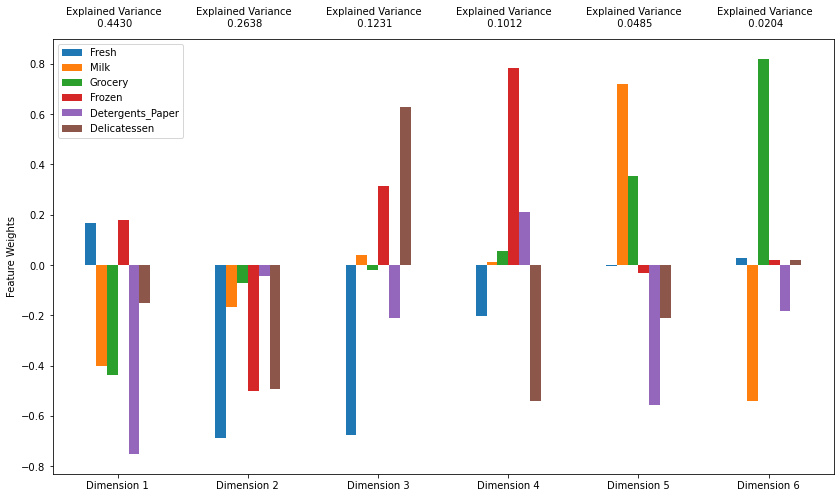

In [20]:
# apply PCA by fitting the good_data with the same number of dimensions as features

from sklearn.decomposition import PCA
import renders as rs # use renders.py file

pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

pca_results = rs.pca_results(good_data, pca)

In [21]:
display(pca_results)
display(type(pca_results))

display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [22]:
# to dos : write insights about above dimensions

In [23]:
display(pd.DataFrame(np.round(pca_samples, 4), 
                     columns =pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415



### Dimensionality Reduction

In [24]:
# apply pca by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# transform the good data using PCA
reduced_data = pca.transform(good_data)

# transform log_samples using the pca fit
pca_samples = pca.transform(log_samples)

# create a DataFrame for reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


In [25]:
# dsiplay sample log-data after applying PCA transformation in two dimesions
display(pd.DataFrame(np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


## Clustering
### Creating clusters

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#create range of clusters
range_n_clusters = list(range(2,11))
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10]

### GMM Implementation


In [36]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    
    centres = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    
    print('For n_clusters = {}, The average silhouette_score is {}'.format(n_clusters, score))
    

For n_clusters = 2, The average silhouette_score is 0.37598604546578696
For n_clusters = 3, The average silhouette_score is 0.34310670219691586
For n_clusters = 4, The average silhouette_score is 0.2932549939604821
For n_clusters = 5, The average silhouette_score is 0.2640728965083572
For n_clusters = 6, The average silhouette_score is 0.3167551106383288
For n_clusters = 7, The average silhouette_score is 0.2905087833096869
For n_clusters = 8, The average silhouette_score is 0.30826919137972
For n_clusters = 9, The average silhouette_score is 0.31717105020918135
For n_clusters = 10, The average silhouette_score is 0.32286798462046673


### KMeans Implementation

In [42]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    
    centres = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    
    print('For n_clusters = {}, The average silhouette_score is {}'.format(n_clusters, score))
    

For n_clusters = 2, The average silhouette_score is 0.37569605698155983
For n_clusters = 3, The average silhouette_score is 0.3874200083825958
For n_clusters = 4, The average silhouette_score is 0.33279284182870406
For n_clusters = 5, The average silhouette_score is 0.342846012407545
For n_clusters = 6, The average silhouette_score is 0.34791915096913867
For n_clusters = 7, The average silhouette_score is 0.3534227560669175
For n_clusters = 8, The average silhouette_score is 0.3465090486544005
For n_clusters = 9, The average silhouette_score is 0.3626138534569325
For n_clusters = 10, The average silhouette_score is 0.3535112788840998


The best score obtained is with number of clusters with 2.
### Cluster Visualization

In [50]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

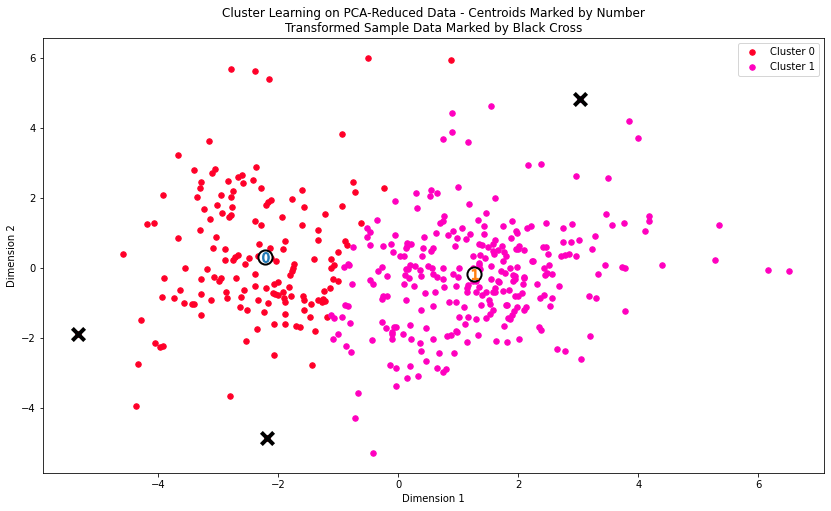

In [51]:
# display the result of clustering from the implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples) # used from renders.py file

In above visualization, the centroids are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segmentation, a cluster's centre point corresponds to the average customer of that segment.  
Since the data is currently reduced in dimension and scaled by a logarithms, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [55]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)


segments = ['Segment {}'.format(i) for i in range(0, len(centers))]

true_centers = pd.DataFrame(np.round(true_centers), columns=df.columns)
true_centers.index = segments

display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


In [58]:
display(true_centers - df.median()) # clusters' deviation from median

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4952.0,4210.0,7463.5,-656.0,3879.5,-3.5
Segment 1,449.0,-1513.0,-1990.5,549.0,-463.5,-233.5


In [59]:
display(true_centers - df.mean()) # clusters' deviation from mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8448.297727,2040.734091,4267.722727,-2201.931818,1814.506818,-562.870455
Segment 1,-3047.297727,-3682.265909,-5186.277273,-996.931818,-2528.493182,-792.870455


We can see that deviation from mean is not meaningful comparison for Segment 1 as everything is negative in it. So we will be using deviation from median. 
Moreover we can gain an insight such as,
- Segment 0 : Spending on 'Milk', 'Grocery', 'Detergent_Paper' are above the median. Therefore this could be a Restaurants or Cafes
- Segment 1 : Spending on 'Fresh' and 'Frozer' are above median. So we can say that this could be typical in seafood or meat markets.


In [64]:
for i, pred in enumerate(sample_preds):
    print('Sample point', i, 'is predicted to be in Cluster', pred)

Sample point 0 is predicted to be in Cluster 0
Sample point 1 is predicted to be in Cluster 0
Sample point 2 is predicted to be in Cluster 1


In [65]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


Sample 1: 
- Spending on "Milk", "Grocery" And "Detergents_Paper" is high.  
It is evident that this belongs to cluster 0 (segment 0)  

Sample 2: 
- Spending on "Milk", "Grocery" and "Detergents_Paper" is high.  
But spending on "Fresh" is high too.   
Considering spending on "Frozen" is low, I guess it makes sense to cluster it under cluster 0.

Sample 3: 
- It is evident that this belongs to cluster 1 because spending on "Fresh" and "Frozen" is high.


In [68]:
dupes

[65, 66, 75, 128, 154]

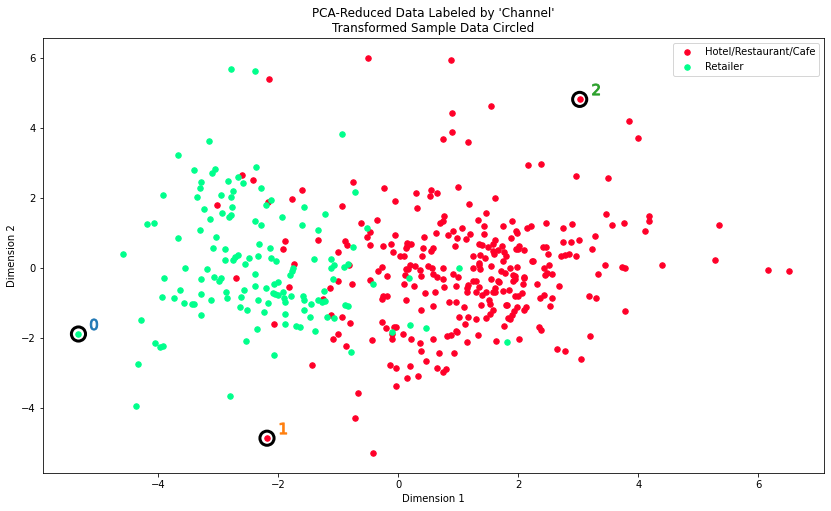

In [69]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, dupes, pca_samples)